In [3]:
import numpy as np
import xarray as xr
import gcsfs
from matplotlib import pyplot as plt
from xgcm import Grid
from xhistogram.xarray import histogram
%matplotlib inline
from matplotlib import colors as cols
import scipy.special as sp
from intake import open_catalog

In [4]:
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/channel.yaml")
ds01  = cat["channel_ridge_resolutions_01km"].to_dask()
ds05  = cat["channel_ridge_resolutions_05km"].to_dask()
ds20  = cat["channel_ridge_resolutions_20km"].to_dask()

In [5]:
plt.rcParams.update({'font.size': 18})
# plt.rcParams.update({'font.size': 16})

In [6]:
grid20 = Grid(ds20, periodic='X')
grid05 = Grid(ds05, periodic='X')
grid01 = Grid(ds01, periodic='X')

In [7]:
horispace01 = 1e3
horispace05 = 5e3
horispace20 = 20e3
time_index = 0
depth = -50
f =  -0.83e-4
daytime = 86400
alpha = 2e-4
gravity = 9.81
# ybound = 2e5
ybound = 5e5

In [8]:
WCv_full = np.load('./wpcpData/WCZ-V_full.npy')
WCm_full = np.load('./wpcpData/WCZ-M_full.npy')
WCac_full = np.load('./wpcpData/WCZ-AC_full.npy')
WCc_full = np.load('./wpcpData/WCZ-C_full.npy')

In [9]:
WCm05_full = np.load('./wpcpData/WCZ-M_full05.npy')
WCac05_full = np.load('./wpcpData/WCZ-AC_full05.npy')
WCc05_full = np.load('./wpcpData/WCZ-C_full05.npy')

In [10]:
WpCpv = np.load('./wpcpData/WpCpZ-V.npy')
WpCpm = np.load('./wpcpData/WpCpZ-M.npy')
WpCpac = np.load('./wpcpData/WpCpZ-AC.npy')
WpCpc = np.load('./wpcpData/WpCpZ-C.npy')

In [11]:
WpCpm05 = np.load('./wpcpData/WpCpZ-M05.npy')
WpCpac05 = np.load('./wpcpData/WpCpZ-AC05.npy')
WpCpc05 = np.load('./wpcpData/WpCpZ-C05.npy')

In [12]:
Difv = np.load('./DifZup.npy')
Difm = np.load('./DifZmid.npy')
Difac = np.load('./DifZac.npy')
Difc = np.load('./DifZc.npy')

In [28]:
Difm05 = np.load('./DifZmid05.npy')
Difac05 = np.load('./DifZac05.npy')
Difc05 = np.load('./DifZc05.npy')

In [31]:
SFup = 0.2693270942134104
SFmid = 14.265757651489874
SFac = 7.6998566079772015
SFc = 1.8564787017918651

SFmid05 = 0.5292262059893121
SFac05 = 0.25681221263547394
SFc05 =  0.08150786053795972


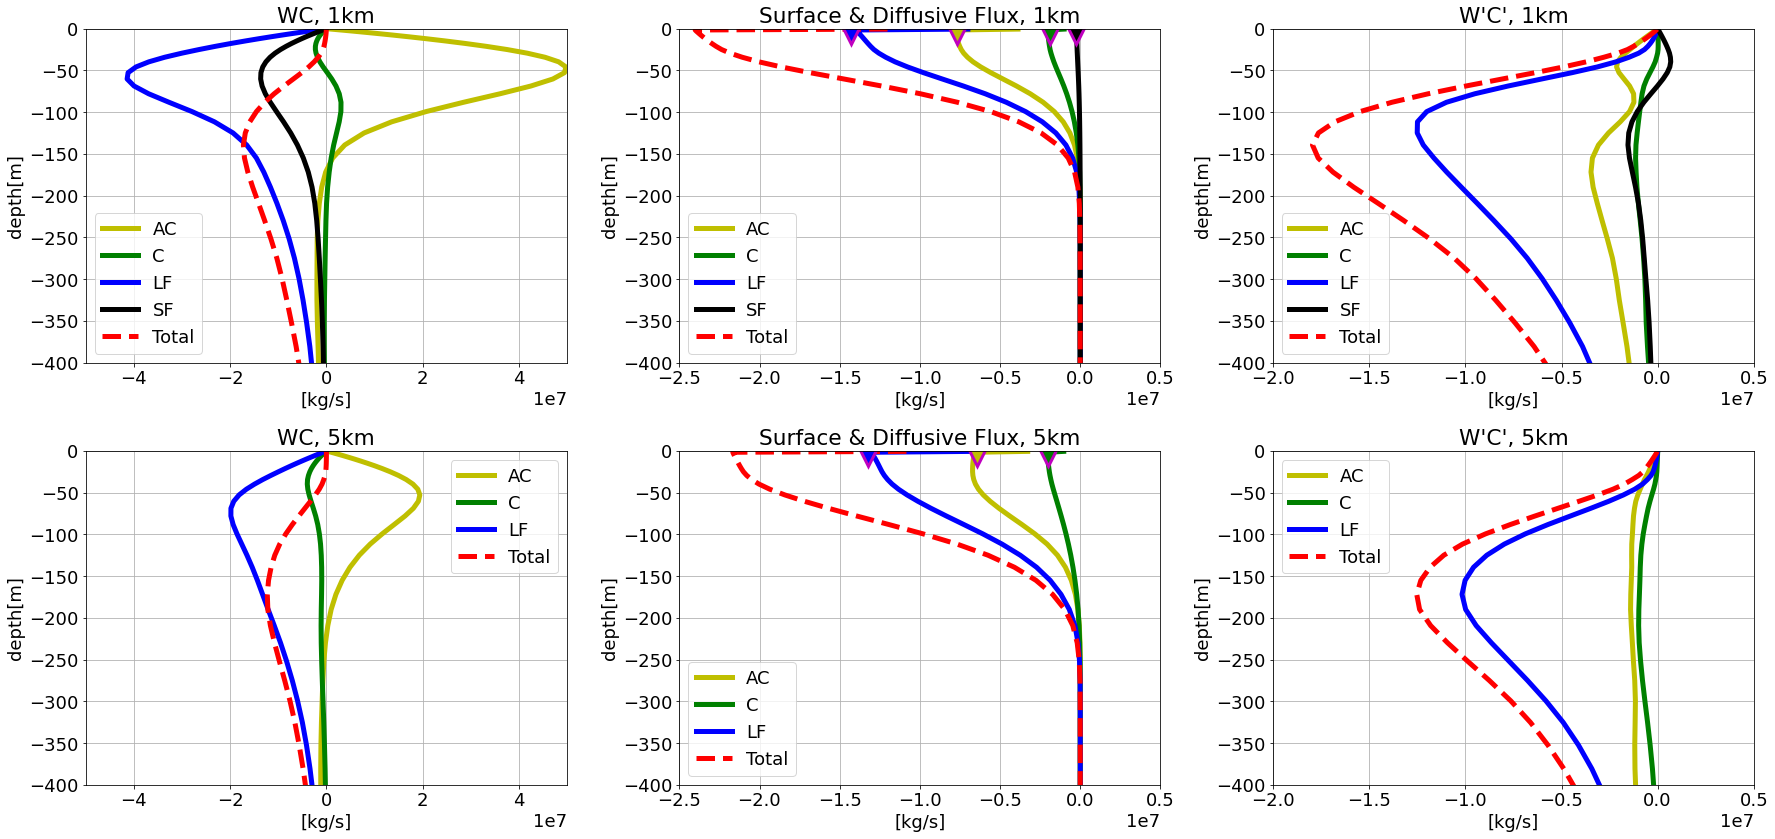

In [59]:
plt.figure(figsize=(25,12))



plt.subplot(231)

plt.plot(WCac_full*1000**2, ds01.Z.values,'y', linewidth = 5)
plt.plot(WCc_full*1000**2, ds01.Z.values,'g', linewidth = 5)
plt.plot(WCm_full*1000**2, ds01.Z.values,'b', linewidth = 5)
plt.plot(WCv_full*1000**2, ds01.Z.values,'k', linewidth = 5)
plt.plot((WCv_full+WCac_full+WCc_full+WCm_full)*1000**2, ds01.Z.values,'r--', linewidth = 5)
plt.legend(['AC','C','LF','SF','Total'])
plt.title('WC, 1km')
# plt.xlim(-75, 75) 
plt.ylim(-400, 0) 
plt.xlim(-5e7, 5e7) 
plt.ylabel('depth[m]') 
plt.xlabel('[kg/s]')
plt.grid()

plt.subplot(232)
plt.plot(Difac*1000**2, ds01.Z.values,'y', linewidth = 5)
plt.plot(Difc*1000**2, ds01.Z.values,'g', linewidth = 5)
plt.plot(Difm*1000**2, ds01.Z.values,'b', linewidth = 5)
plt.plot(Difv*1000**2, ds01.Z.values, 'k', linewidth = 5)
plt.plot((Difac+Difc+Difm+Difv)*1000**2, ds01.Z.values,'r--', linewidth = 5)

plt.plot(-SFup*1000**2, -0, 'kv', markersize = 30,  markeredgewidth=3, markeredgecolor=(.75, 0, .75, 1))
plt.plot(-SFc*1000**2, -0,  'gv', markersize = 30 , markeredgewidth=3, markeredgecolor=(.75, 0, .75, 1))
plt.plot(-SFac*1000**2 , -0,  'yv', markersize = 30,  markeredgewidth=3, markeredgecolor=(.75, 0, .75, 1))
plt.plot(-SFmid*1000**2, -0,  'bv', markersize = 30,  markeredgewidth=3, markeredgecolor=(.75, 0, .75, 1))

plt.legend(['AC','C','LF','SF','Total'])
plt.title('Surface & Diffusive Flux, 1km')
# plt.xlim(-75, 75) 
plt.ylim(-400, 0) 
plt.xlim(-2.5e7, .5e7)
plt.ylabel('depth[m]') 
plt.xlabel('[kg/s]')
plt.grid()

plt.subplot(233)
plt.plot(WpCpac*1000**2, ds01.Z.values,'y', linewidth = 5)
plt.plot(WpCpc*1000**2, ds01.Z.values,'g', linewidth = 5)
plt.plot(WpCpm*1000**2, ds01.Z.values,'b', linewidth = 5)
plt.plot(WpCpv*1000**2, ds01.Z.values,'k', linewidth = 5)
plt.plot((WpCpac+WpCpc+WpCpm+WpCpv)*1000**2, ds01.Z.values,'r--', linewidth = 5)
plt.legend(['AC','C','LF','SF','Total'])
plt.title('W\'C\', 1km')
# plt.xlim(-75, 75) 
plt.ylim(-400, 0) 
plt.xlim(-2e7, .5e7)
plt.ylabel('depth[m]') 
plt.xlabel('[kg/s]')
plt.grid()

plt.subplot(234)
plt.plot(WCac05_full*25*1000**2, ds01.Z.values,'y', linewidth = 5)
plt.plot(WCc05_full*25*1000**2, ds01.Z.values,'g', linewidth = 5)
plt.plot(WCm05_full*25*1000**2, ds01.Z.values,'b', linewidth = 5)
plt.plot((WCac05_full+WCc05_full+WCm05_full)*5000**2, ds01.Z.values,'r--', linewidth = 5)
plt.legend(['AC','C','LF','Total'])
plt.title('WC, 5km')
# plt.xlim(-75, 75) 
plt.ylim(-400, 0) 
plt.xlim(-5e7, 5e7)
plt.ylabel('depth[m]') 
plt.xlabel('[kg/s]')
plt.grid()


plt.subplot(235)
plt.plot(Difac05*1000**2, ds01.Z.values,'y', linewidth = 5)
plt.plot(Difc05*1000**2, ds01.Z.values,'g', linewidth = 5)
plt.plot(Difm05*1000**2, ds01.Z.values,'b', linewidth = 5)
plt.plot((Difac05+Difc05+Difm05)*1000**2, ds01.Z.values,'r--', linewidth = 5)

plt.plot(-SFc05*25*1000**2, -0.1,  'gv', markersize = 30, markeredgewidth=3, markeredgecolor=(.75, 0, .75, 1))
plt.plot(-SFac05*25*1000**2 , -0.1,  'yv', markersize = 30,  markeredgewidth=3, markeredgecolor=(.75, 0, .75, 1))
plt.plot(-SFmid05*25*1000**2, -0.1,  'bv', markersize = 30,  markeredgewidth=3, markeredgecolor=(.75, 0, .75, 1))

plt.legend(['AC','C','LF','Total'])
plt.title('Surface & Diffusive Flux, 5km')
# plt.xlim(-75, 75) 
plt.ylim(-400, 0) 
plt.xlim(-2.5e7, .5e7)
plt.ylabel('depth[m]') 
plt.xlabel('[kg/s]')
plt.grid()


plt.subplot(236)
plt.plot(WpCpac05*25*1000**2, ds01.Z.values,'y', linewidth = 5)
plt.plot(WpCpc05*25*1000**2, ds01.Z.values,'g', linewidth = 5)
plt.plot(WpCpm05*25*1000**2, ds01.Z.values,'b', linewidth = 5)
plt.plot((WpCpac05+WpCpc05+WpCpm05)*5000**2, ds01.Z.values,'r--', linewidth = 5)
plt.legend(['AC','C','LF','Total'])
plt.title('W\'C\', 5km')
# plt.xlim(-75, 75) 
plt.ylim(-400, 0)
plt.xlim(-2e7, .5e7)
plt.ylabel('depth[m]') 
plt.xlabel('[kg/s]')
plt.grid()

plt.tight_layout()

plt.savefig('fig11.pdf')